In [1]:
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt 
from vega_datasets import data

In [2]:
workouts = pd.read_csv('workouts_cleaned.csv', index_col=0)
workouts.columns

Index(['type', 'date', 'moving_time', 'activity_id', 'name', 'distance',
       'elevation gain', 'trainer', 'average_speed', 'max_speed',
       'average_watts', 'suffer_score', 'average_heartrate', 'average_cadence',
       'kilojoules', 'gear_id', 'average_temp', 'start_longitude',
       'start_latitude', 'timezone', 'location_city', 'location_state',
       'location_country', 'year', 'month', 'mnth_yr', 'day', 'dow',
       'week_number', 'hour', 'moving_time (minutes)'],
      dtype='object')

In [3]:
workouts.type.value_counts()

ride       843
run        315
walk        60
workout     45
hike         9
yoga         4
swim         4
Name: type, dtype: int64

In [4]:
workouts.trainer.value_counts()

0    978
1    302
Name: trainer, dtype: int64

In [5]:
workouts.year.value_counts()

2020    288
2016    216
2015    202
2019    200
2018    147
2017    138
2014     72
2021     17
Name: year, dtype: int64

In [6]:
workouts.dow.value_counts()

Sunday       210
Saturday     207
Wednesday    204
Tuesday      197
Thursday     166
Monday       154
Friday       142
Name: dow, dtype: int64

In [7]:
workouts.describe()

,activity_id,distance,elevation gain,trainer,average_speed,max_speed,average_watts,suffer_score,average_heartrate,average_cadence,kilojoules,average_temp,start_longitude,start_latitude,year,month,day,week_number,hour,moving_time (minutes)
count,1.280000e+03,1280.000000,1280.00000,1280.000000,1280.000000,1280.000000,795.000000,1280.000000,1280.00000,755.000000,1280.000000,643.000000,887.000000,887.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.0,1280.000000
mean,1.766038e+09,10.638563,511.55000,0.235937,128.700781,128.700781,126.601761,57.462926,146.53540,77.450993,503.306084,22.055988,-84.054938,35.245039,2017.502344,6.418750,16.143750,26.196875,0.0,54.297656
std,1.356712e+09,11.536515,854.25466,0.424749,2990.162860,2990.162860,37.609296,47.381440,16.23832,10.754323,307.857547,7.603695,61.215617,13.286858,2.008581,3.481836,8.919217,15.301923,0.0,49.392475
min,1.042879e+08,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-160.000000,-45.030000,2014.000000,1.000000,1.000000,1.000000,0.0,0.000000
25%,5.274401e+08,1.880000,0.00000,0.000000,5.000000,5.000000,107.200000,27.000000,141.77500,72.700000,355.025000,17.000000,-105.280000,36.100000,2016.000000,3.000000,8.000000,13.000000,0.0,22.000000
50%,1.502786e+09,7.745000,102.00000,0.000000,11.000000,11.000000,129.700000,57.462926,146.53540,79.500000,503.306084,24.000000,-105.000000,39.750000,2018.000000,6.000000,16.000000,26.000000,0.0,43.000000
75%,2.956181e+09,15.547500,729.75000,0.000000,16.000000,16.000000,149.100000,65.000000,155.40000,85.300000,503.306084,28.000000,-86.850000,40.010000,2019.000000,9.000000,24.000000,39.000000,0.0,68.000000
max,4.681776e+09,101.890000,9558.00000,1.000000,79200.000000,79200.000000,236.200000,383.000000,185.60000,101.000000,3193.000000,36.000000,175.000000,53.990000,2021.000000,12.000000,31.000000,53.000000,0.0,396.000000


In [8]:
def Summary_Statistics():
    workouts_data = workouts.copy()
    workouts_data["date"] = workouts_data["date"].astype(str) 
    print('====== Summary Statistics ====== ')
    print('Total Number of Workouts: {:,}'.format( len(workouts_data)))
    print('Total Distance: {:,} miles'.format(round(workouts_data['distance'].sum(),2)))
    print('Total Elevation Gain: {:,} feet'.format(round(workouts_data['elevation gain'].sum(),2)))
    average_distance = round(workouts_data['distance'].mean(),1)
    print('Average Distance: {:,} miles'.format(average_distance))

    average_time = round(workouts_data['moving_time (minutes)'].mean(),2)
    print('Average Time: {:,} minutes'.format( average_time))
    average_hr = int(round(workouts_data['average_heartrate'].mean(), 2))
    print('Average Heartrate: {:,} bpm'.format(average_hr))
    average_ascent = int(round(workouts_data['elevation gain'].mean(), 2))
    print('Average Total Ascent: {:,} ft'.format(average_ascent))

In [9]:
Summary_Statistics()

====== Summary Statistics ====== 
Total Number of Workouts: 1,280
Total Distance: 13,617.36 miles
Total Elevation Gain: 654,784 feet
Average Distance: 10.6 miles
Average Time: 54.3 minutes
Average Heartrate: 146 bpm
Average Total Ascent: 511 ft


In [10]:
workouts.columns

Index(['type', 'date', 'moving_time', 'activity_id', 'name', 'distance',
       'elevation gain', 'trainer', 'average_speed', 'max_speed',
       'average_watts', 'suffer_score', 'average_heartrate', 'average_cadence',
       'kilojoules', 'gear_id', 'average_temp', 'start_longitude',
       'start_latitude', 'timezone', 'location_city', 'location_state',
       'location_country', 'year', 'month', 'mnth_yr', 'day', 'dow',
       'week_number', 'hour', 'moving_time (minutes)'],
      dtype='object')

<AxesSubplot:>

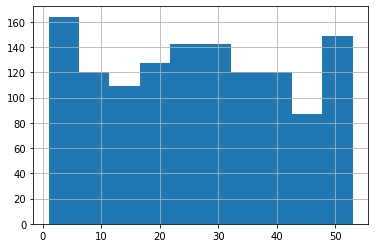

In [11]:
workouts.week_number.hist()

<AxesSubplot:>

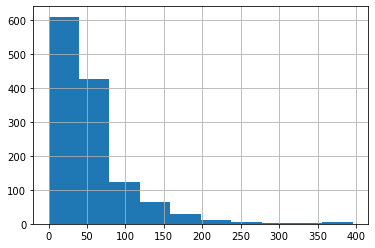

In [12]:
workouts['moving_time (minutes)'].hist()

<AxesSubplot:>

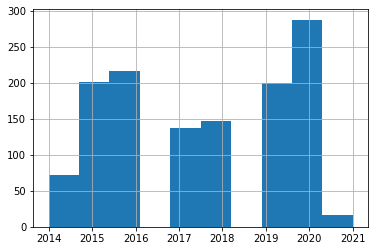

In [13]:
workouts.year.hist()

<AxesSubplot:>

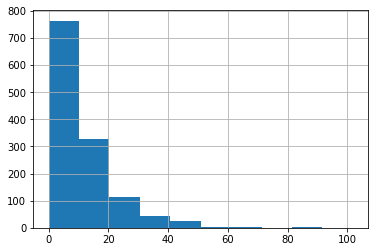

In [14]:
workouts.distance.hist()

<AxesSubplot:>

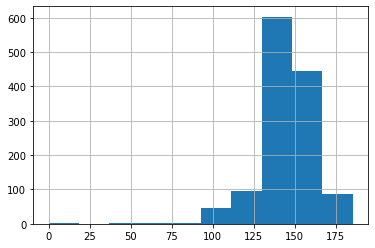

In [15]:
workouts.average_heartrate.hist()

In [16]:
states = alt.topo_feature(data.us_10m.url, feature='states')

# US states background
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=800,
    height=500
).project('albersUsa')

# airport positions on background
points = alt.Chart(workouts).mark_circle(
    size=20,
    color='steelblue'
).encode(
    longitude='start_longitude:Q',
    latitude='start_latitude:Q',
    tooltip=['name', 'date', 'distance', 'elevation gain']
)

background + points.properties(
    title='Workout Across America'
)

alt.LayerChart(...)

In [17]:
workouts.columns

Index(['type', 'date', 'moving_time', 'activity_id', 'name', 'distance',
       'elevation gain', 'trainer', 'average_speed', 'max_speed',
       'average_watts', 'suffer_score', 'average_heartrate', 'average_cadence',
       'kilojoules', 'gear_id', 'average_temp', 'start_longitude',
       'start_latitude', 'timezone', 'location_city', 'location_state',
       'location_country', 'year', 'month', 'mnth_yr', 'day', 'dow',
       'week_number', 'hour', 'moving_time (minutes)'],
      dtype='object')

In [18]:
pd.pivot_table(workouts,index=["type"],values=["distance","average_heartrate","elevation gain","trainer","moving_time (minutes)","suffer_score"])

,average_heartrate,distance,elevation gain,moving_time (minutes),suffer_score,trainer
type,,,,,,
hike,138.037267,3.745556,886.555556,83.666667,53.384770,0.000000
ride,147.485508,15.207070,712.421115,65.158956,66.781661,0.247924
run,151.508710,2.111460,136.673016,32.879365,46.422324,0.180952
swim,146.535400,0.070000,0.000000,2.750000,57.462926,0.500000
walk,117.540590,1.645000,53.033333,30.066667,6.874382,0.033333
workout,135.194809,0.000000,0.000000,33.822222,29.609040,0.688889
yoga,136.276550,0.000000,0.000000,31.250000,44.347194,0.250000


<AxesSubplot:>

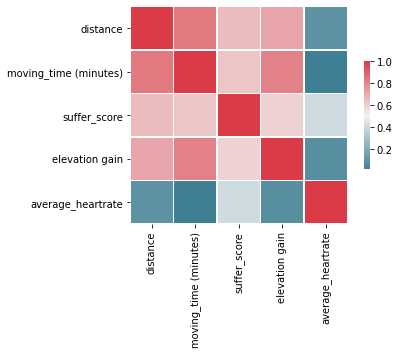

In [19]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(workouts[['distance','moving_time (minutes)','suffer_score','elevation gain','average_heartrate']].corr(),vmax=1, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
df1 = workouts.select_dtypes([np.int, np.float])

for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df1)

NameError: name 'np' is not defined

<AxesSubplot:>

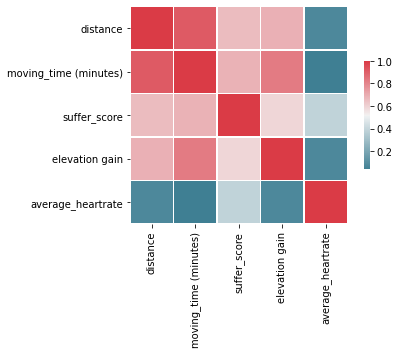

In [21]:
rides = workouts[workouts.type == 'ride']
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(rides[['distance','moving_time (minutes)','suffer_score','elevation gain','average_heartrate']].corr(),vmax=1, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


<AxesSubplot:>

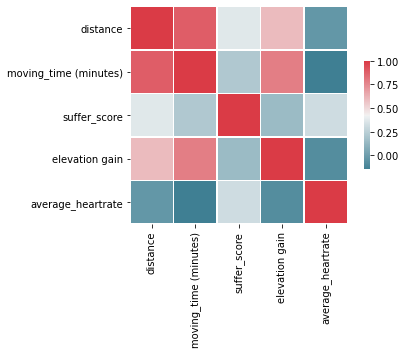

In [22]:
runs = workouts[workouts.type == 'run']
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(runs[['distance','moving_time (minutes)','suffer_score','elevation gain','average_heartrate']].corr(),vmax=1, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


<AxesSubplot:>

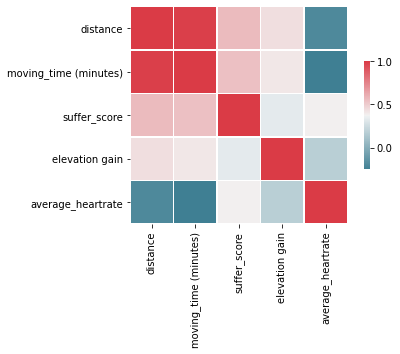

In [23]:
walks = workouts[workouts.type == 'walk']
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(walks[['distance','moving_time (minutes)','suffer_score','elevation gain','average_heartrate']].corr(),vmax=1, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


<AxesSubplot:>

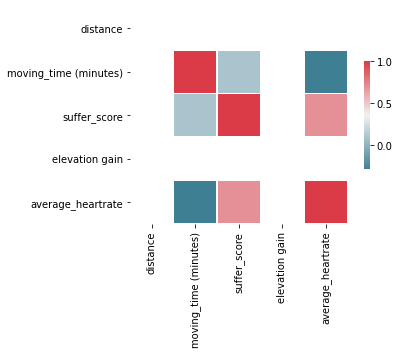

In [24]:
workout = workouts[workouts.type == 'workout']
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(workout[['distance','moving_time (minutes)','suffer_score','elevation gain','average_heartrate']].corr(),vmax=1, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


graph for distance: total = 871


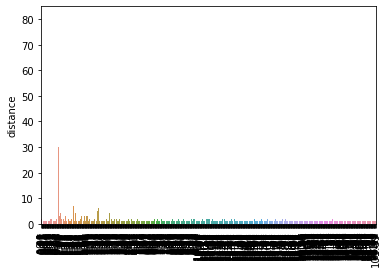

graph for moving_time (minutes): total = 190


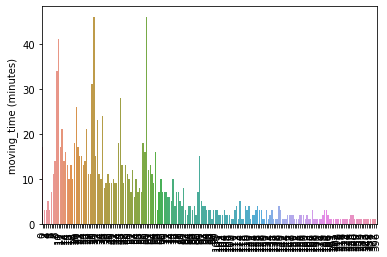

graph for suffer_score: total = 191


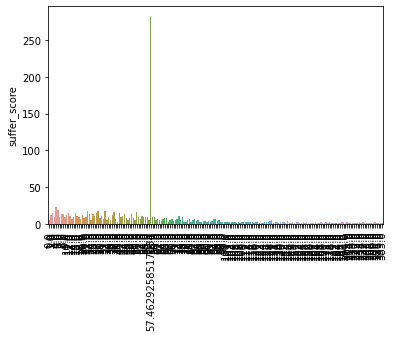

graph for elevation gain: total = 511


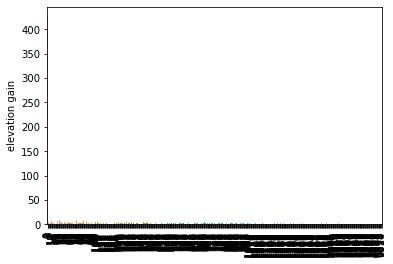

graph for average_heartrate: total = 495


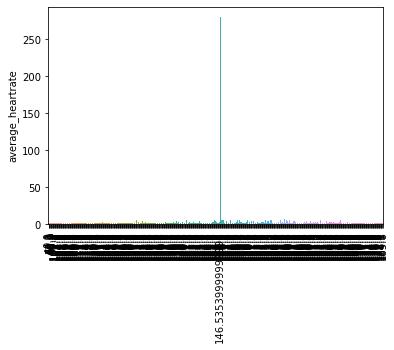

graph for trainer: total = 2


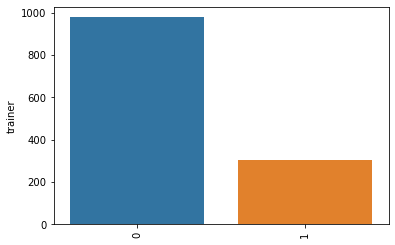

graph for average_speed: total = 31


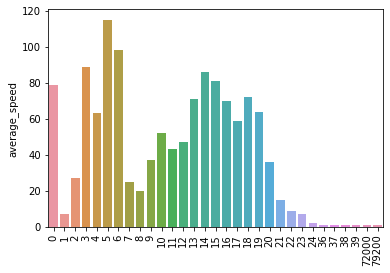

graph for type: total = 7


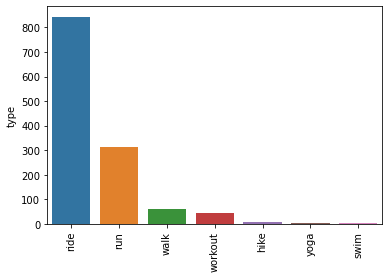

In [25]:
df_cat = workouts[['distance','moving_time (minutes)','suffer_score','elevation gain','average_heartrate','trainer','average_speed','type']]

for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()